### Assignment Solution

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Lending-company.csv")
df.head()

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,2,LoanID_2,Product D,Female,Location 6,Region 6,NaN,02/01/2019,2200,45,365,3161,4096,16041,Active
2,3,LoanID_3,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,NaN
3,4,LoanID_4,Product A,Male,Location 26,Region 2,17600.0,NaN,2200,45,365,3141,4166,16321,Active
4,5,LoanID_5,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


#### EDA

In [4]:
df.columns

Index(['LoanID', 'StringID', 'Product', 'CustomerGender', 'Location', 'Region',
       'TotalPrice', 'StartDate', 'Deposit', 'DailyRate', 'TotalDaysYr',
       'AmtPaid36', 'AmtPaid60', 'AmtPaid360', 'LoanStatus'],
      dtype='object')

In [5]:
df.dtypes

LoanID              int64
StringID           object
Product            object
CustomerGender     object
Location           object
Region             object
TotalPrice        float64
StartDate          object
Deposit             int64
DailyRate           int64
TotalDaysYr         int64
AmtPaid36           int64
AmtPaid60           int64
AmtPaid360          int64
LoanStatus         object
dtype: object

In [6]:
df.isnull().sum()

LoanID             0
StringID           0
Product            0
CustomerGender     0
Location           0
Region             1
TotalPrice        25
StartDate          1
Deposit            0
DailyRate          0
TotalDaysYr        0
AmtPaid36          0
AmtPaid60          0
AmtPaid360         0
LoanStatus        37
dtype: int64

In [7]:
df.shape

(1043, 15)

##### Question 1. 

In [8]:
# checking if the the rows missinig totalprice are the same missing loadstatus
df[df['TotalPrice'].isnull()]['LoanStatus'].isnull()

1       False
5       False
56      False
90      False
160     False
220     False
270     False
330     False
380     False
430     False
470     False
520     False
570     False
620     False
680     False
730     False
770     False
820     False
840     False
880     False
910     False
960     False
982     False
1020    False
1039    False
Name: LoanStatus, dtype: bool

They're not the same.

In [9]:
df['TotalPrice'].describe()

count     1018.000000
mean     19562.843811
std       5955.588065
min      13475.000000
25%      16300.000000
50%      17600.000000
75%      20950.000000
max      70225.000000
Name: TotalPrice, dtype: float64

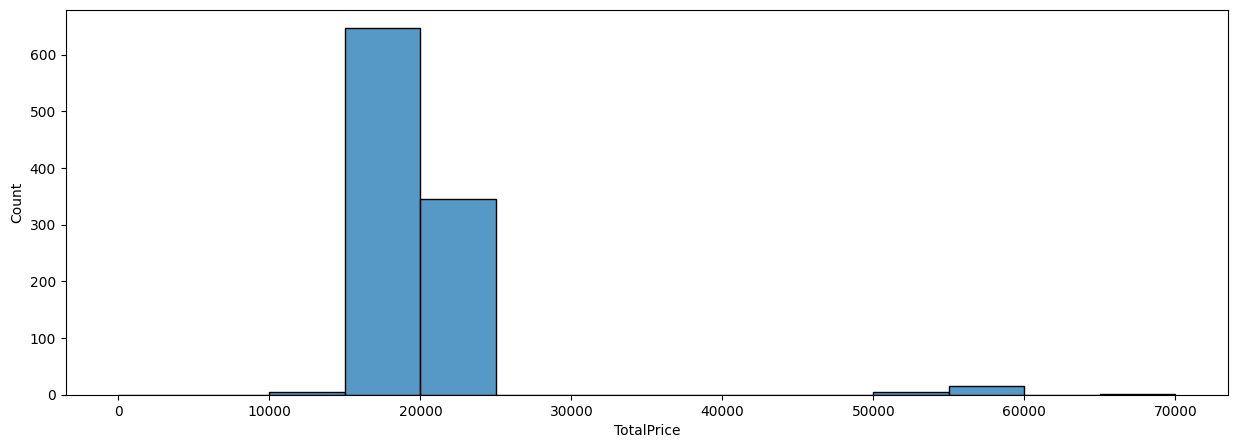

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,5)
sns.histplot(df['TotalPrice'], bins=[bin for bin in range(0, 75000, 5000)])
plt.show()

In [11]:
df['TotalPrice'].isnull().sum()

np.int64(25)

In [12]:
df['LoanStatus'].unique()

array(['Active', nan, 'Blocked', 'Finished Payment'], dtype=object)

In [13]:
df['LoanStatus'].value_counts()

LoanStatus
Finished Payment    534
Active              460
Blocked              12
Name: count, dtype: int64

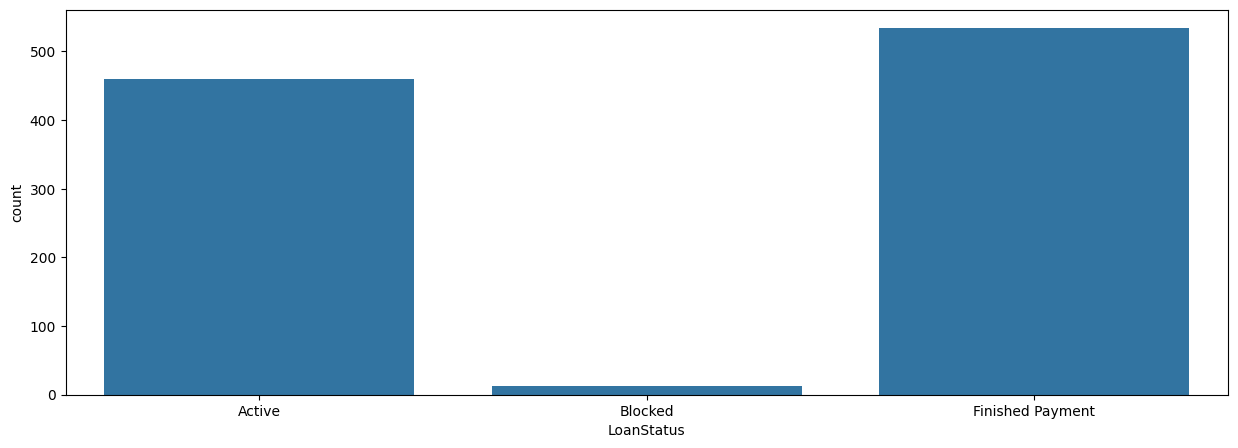

In [14]:
sns.countplot(x = df['LoanStatus'])
plt.show()

In [15]:
df['LoanStatus'].mode()

0    Finished Payment
Name: LoanStatus, dtype: object

In [16]:
df['LoanStatus'] = df['LoanStatus'].fillna(df['LoanStatus'].mode()[0], axis=0)
df['LoanStatus'].isnull().sum()

np.int64(0)

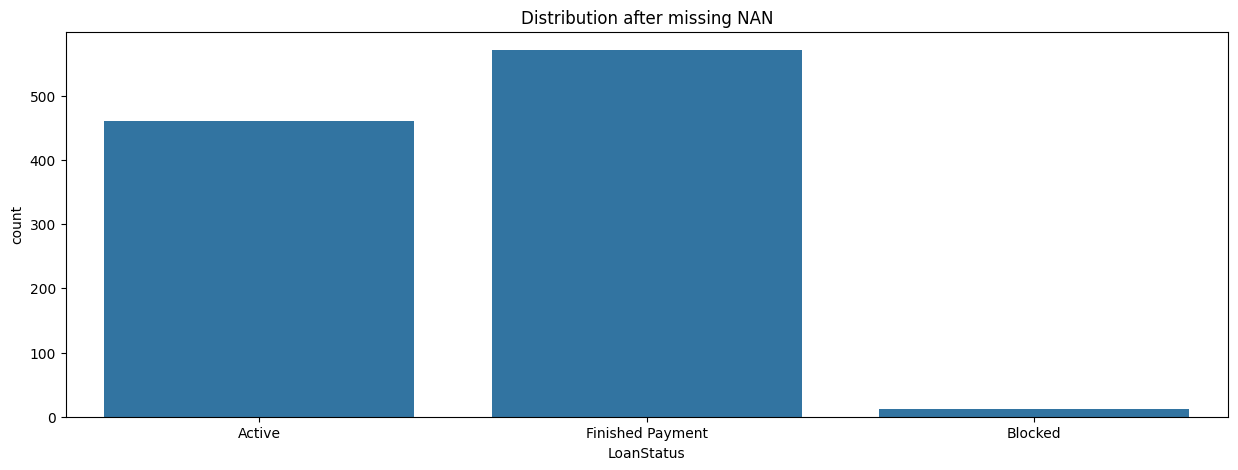

In [17]:
plt.title("Distribution after missing NAN")
sns.countplot(x = df['LoanStatus'])
plt.show()

In [18]:
df.isnull().sum()

LoanID             0
StringID           0
Product            0
CustomerGender     0
Location           0
Region             1
TotalPrice        25
StartDate          1
Deposit            0
DailyRate          0
TotalDaysYr        0
AmtPaid36          0
AmtPaid60          0
AmtPaid360         0
LoanStatus         0
dtype: int64

#### Handling NANs in TotalPrice

In [19]:
products_info = {}
for cat in df['Product'].unique():
    mean = df[df['Product'] == cat]['TotalPrice'].mean().round()
    min = df[df['Product'] == cat]['TotalPrice'].min().round()
    median = df[df['Product'] == cat]['TotalPrice'].median().round()
    max = df[df['Product'] == cat]['TotalPrice'].max().round()
    products_info[cat] = [mean, median, min, max]

products_info = pd.DataFrame.from_dict(products_info, orient='index', columns=['Mean', 'Median', 'Min', 'Max']).sort_values(by='Mean')
print('Product categories mean price:')
products_info.index.rename(('Product Category'), inplace=True)
products_info

Product categories mean price:


,Mean,Median,Min,Max
Product Category,,,,
Product C,16288.0,16300.0,13475.0,22950.0
Product B,17407.0,17300.0,14475.0,55325.0
Product D,20624.0,20950.0,16300.0,55325.0
Product A,21129.0,21600.0,16300.0,55325.0
Product E,45936.0,55325.0,16300.0,55625.0
Product F,69575.0,69575.0,68925.0,70225.0


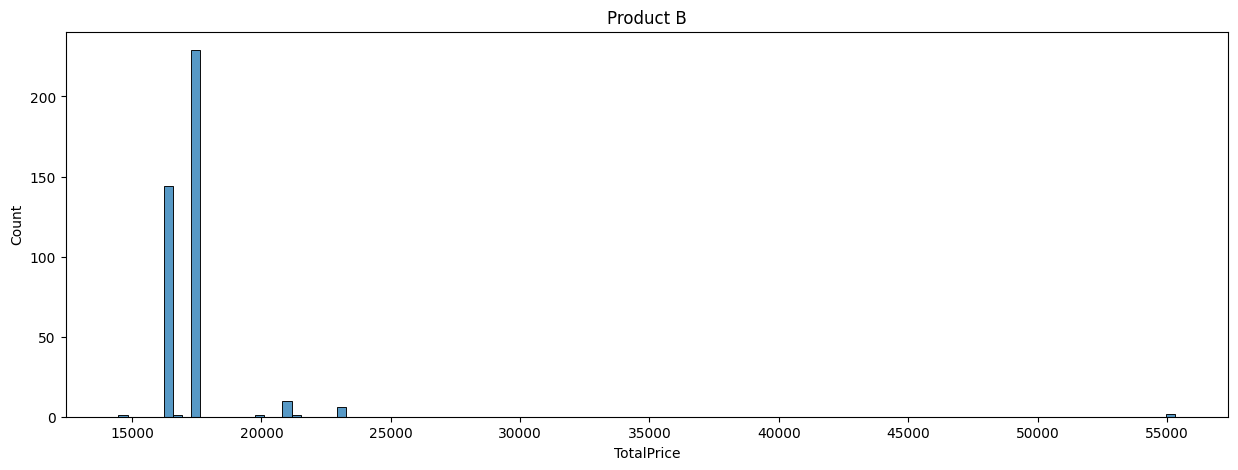

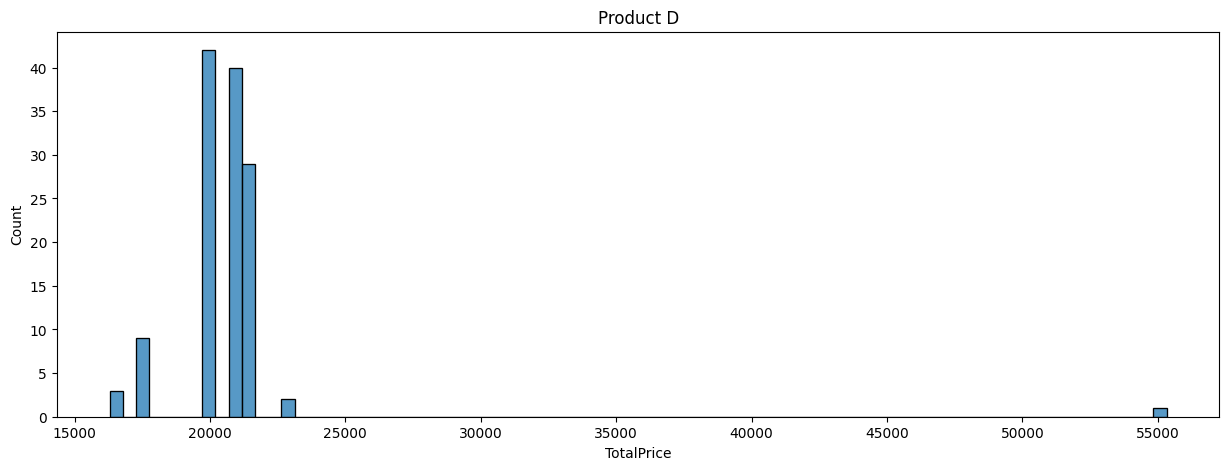

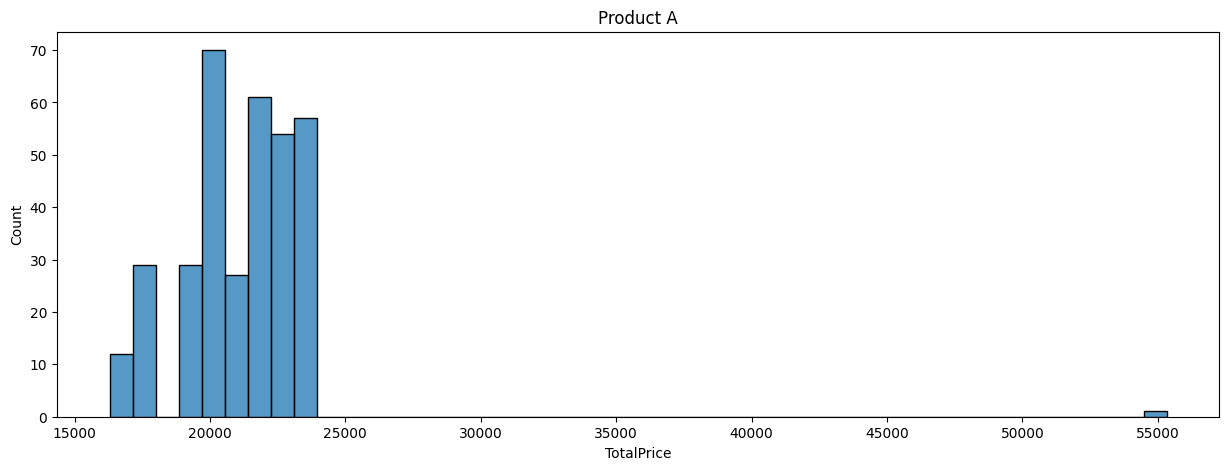

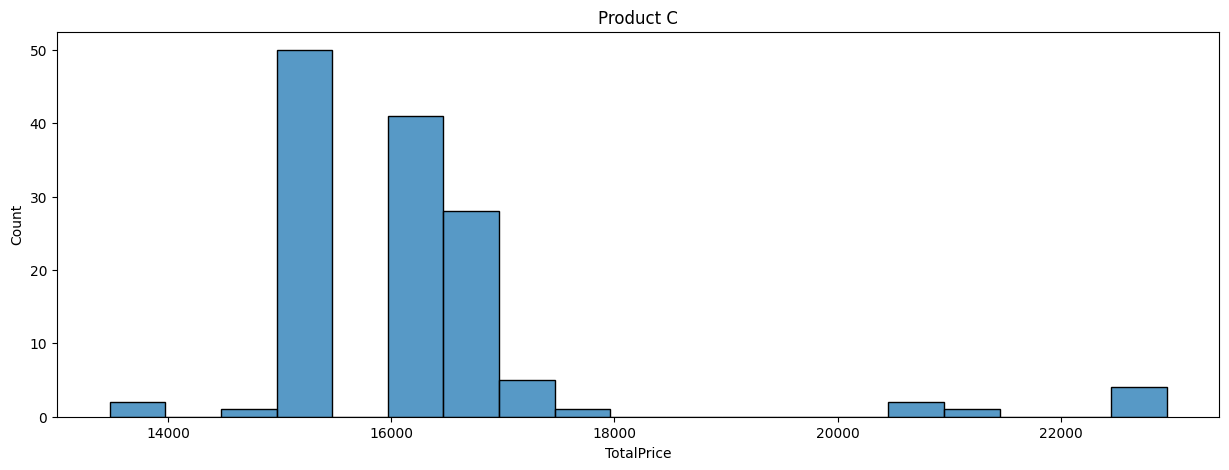

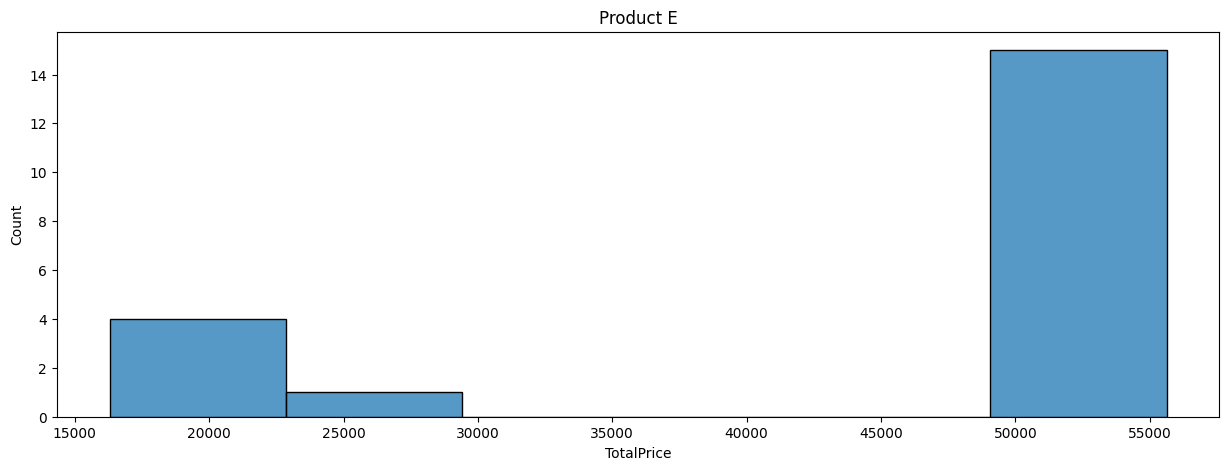

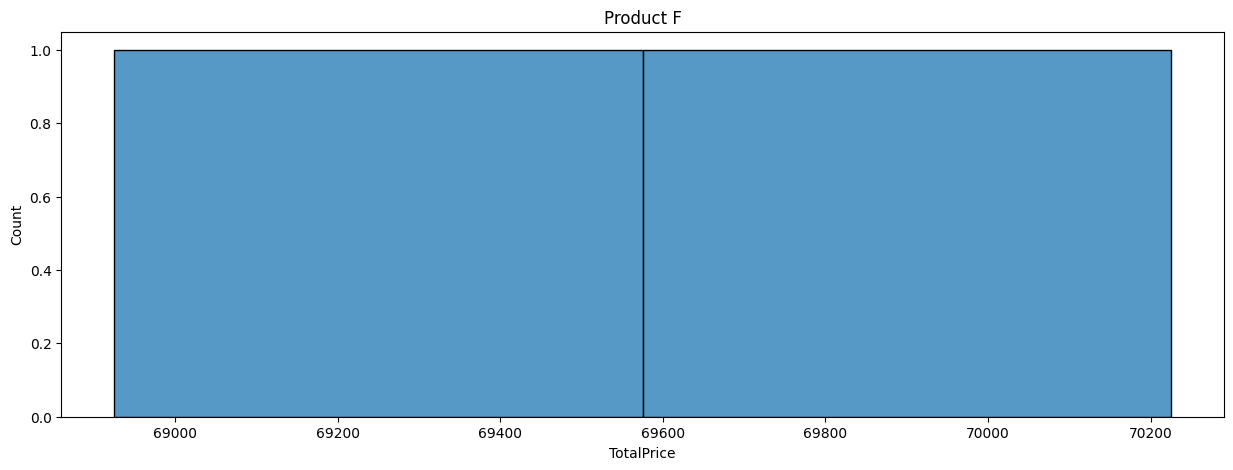

In [20]:
for cat in df['Product'].unique():
    plt.title(cat)
    sns.histplot(df[df['Product'] == cat]['TotalPrice'])
    plt.show()

Because we've outliers in the TotalPrice of most categories, I would use mean value for filling NAN

In [21]:
df.head(1)

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active


In [24]:
products_info.loc['Product A', 'Mean']

np.float64(21129.0)

In [30]:
def impute_price(row: dict):
    if not pd.isna(row['TotalPrice']):
        return row
    else:
        cat = row['Product']
        row['TotalPrice'] = products_info.loc[cat, 'Mean']
        return row

In [34]:
# before imputing the values, let's have a look at its relationship with the Deposit column
for cat in df['Product'].unique():
    deposit = df[df['Product'] == cat]['Deposit'].unique()
    print(cat, deposit, sep=": \n")

Product B: 
[2200 1000 5000 8000]
Product D: 
[2200 5000 1000 8000]
Product A: 
[2200 5000 3000 1000 8000]
Product C: 
[2200 1000 5000]
Product E: 
[8000 1000 5000 2200]
Product F: 
[8000]


Here we also have multiple deposit values for same product, so we can use this column as a reference to impute the total price column. Lets proceed with the function we defined above.

In [41]:
df = df.apply(impute_price, axis=1)
df.head()

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,2,LoanID_2,Product D,Female,Location 6,Region 6,20624.0,02/01/2019,2200,45,365,3161,4096,16041,Active
2,3,LoanID_3,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,Finished Payment
3,4,LoanID_4,Product A,Male,Location 26,Region 2,17600.0,NaN,2200,45,365,3141,4166,16321,Active
4,5,LoanID_5,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


Some of you might agree that we did need to do this much processing to impute the total price column because:
- It doesn't have a lot of NAN rows.
- It is a very important column, so imputing values may cause trouble.
- `My Answer:` In this case, we've a few NAN rows but what if we had a lot of these. So instead of leaving the importance stuff, it's worth practising when you're starting out.

In [42]:
df.isnull().sum()

LoanID            0
StringID          0
Product           0
CustomerGender    0
Location          0
Region            1
TotalPrice        0
StartDate         1
Deposit           0
DailyRate         0
TotalDaysYr       0
AmtPaid36         0
AmtPaid60         0
AmtPaid360        0
LoanStatus        0
dtype: int64

In [48]:
# we only have one missing value, let's use mode.
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['StartDate'] = df['StartDate'].fillna(df['StartDate'].mode()[0])

df.isnull().sum()

LoanID            0
StringID          0
Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDaysYr       0
AmtPaid36         0
AmtPaid60         0
AmtPaid360        0
LoanStatus        0
dtype: int64

In [49]:
df.head()

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,2,LoanID_2,Product D,Female,Location 6,Region 6,20624.0,02/01/2019,2200,45,365,3161,4096,16041,Active
2,3,LoanID_3,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,Finished Payment
3,4,LoanID_4,Product A,Male,Location 26,Region 2,17600.0,23/04/2019,2200,45,365,3141,4166,16321,Active
4,5,LoanID_5,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


### Some business analysis

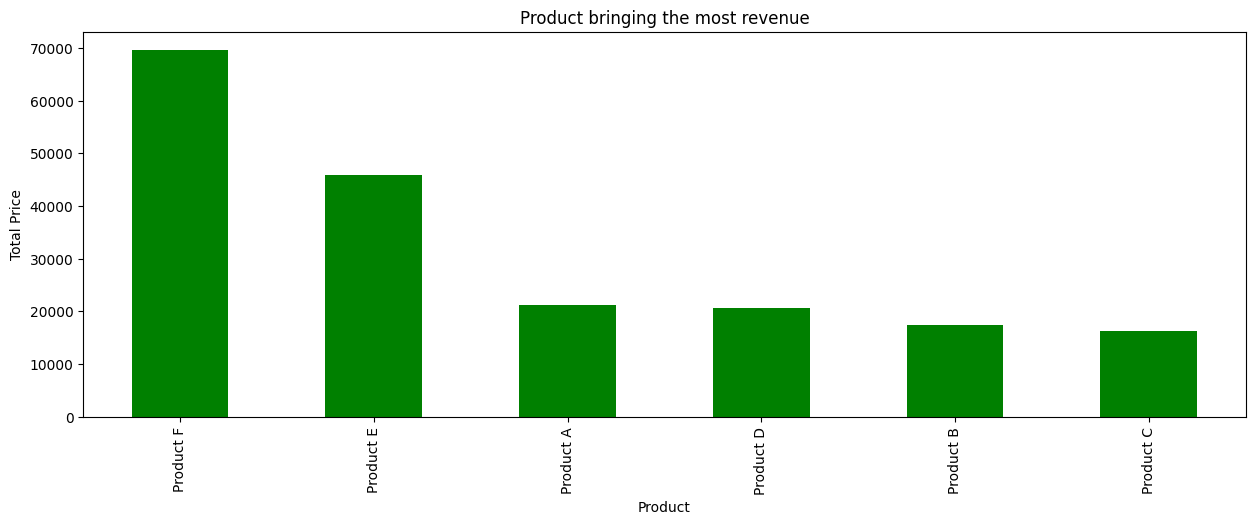

In [62]:
plt.title('Product bringing the most revenue')
plt.ylabel("Total Price")
df.groupby('Product')['TotalPrice'].mean().sort_values(ascending=False).plot.bar(color="green")
plt.show()

C:\Users\Dmm\AppData\Local\Temp\ipykernel_12784\2360702928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product', legend=False, order=sorted_counts.index, palette='cool')


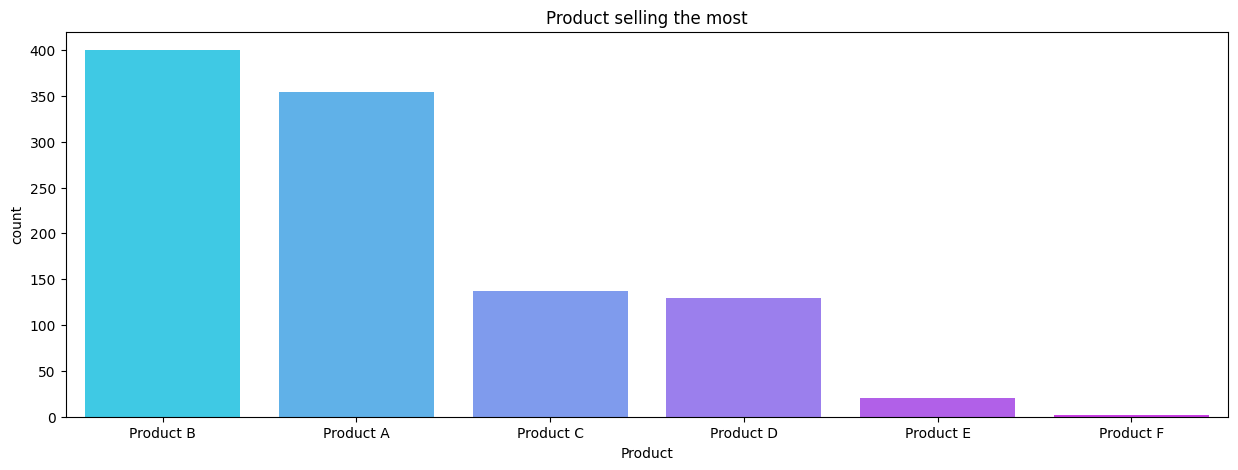

In [70]:
sorted_counts = df['Product'].value_counts().sort_values(ascending=False)

plt.title('Product selling the most')
sns.countplot(data=df, x='Product', legend=False, order=sorted_counts.index, palette='cool')
plt.show()

The Product F has high price. Therefore, bringing the most revenue but not selling the most.

In [71]:
product_b_max_revenue = df[df['Product'] == 'Product B']['TotalPrice'].max()
product_f_max_revenue = df[df['Product'] == 'Product F']['TotalPrice'].max()

print(f"""
Product F max revenue: {product_f_max_revenue},
Product B max revenue: {product_b_max_revenue}
""")


Product F max revenue: 70225.0,
Product B max revenue: 55325.0



`Product B` is the `most selling` product but has low price. Therefore, `bringing less revenue` on the table. `Considerations for increasing revenue could be`:
- Consider offering related products to the customers buying Product B using the Product Recommendation System
- Offer the product in package with other products to boost sales.

In [72]:
df.head()

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,2,LoanID_2,Product D,Female,Location 6,Region 6,20624.0,02/01/2019,2200,45,365,3161,4096,16041,Active
2,3,LoanID_3,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,Finished Payment
3,4,LoanID_4,Product A,Male,Location 26,Region 2,17600.0,23/04/2019,2200,45,365,3141,4166,16321,Active
4,5,LoanID_5,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


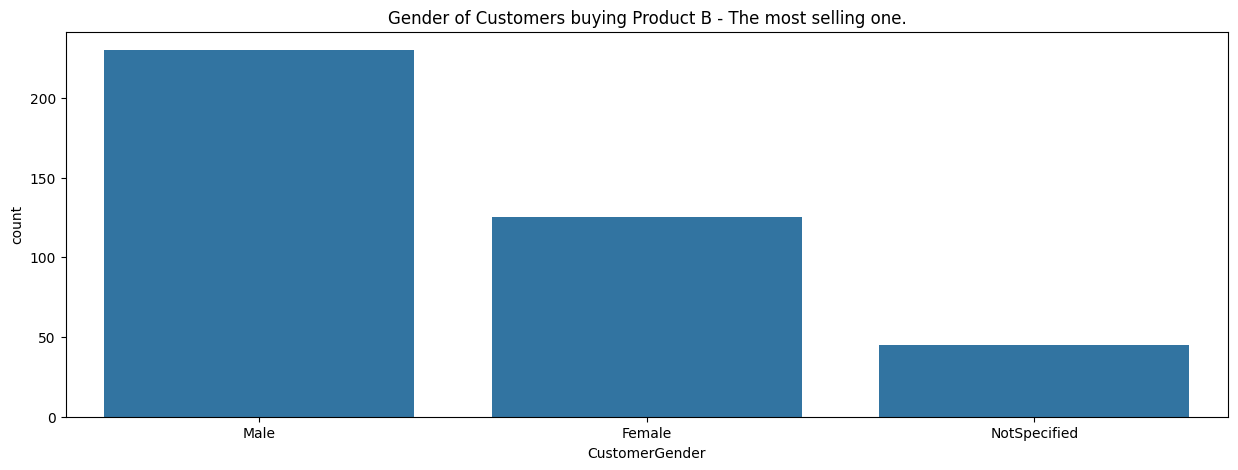

In [78]:
product_b_customers_gndr = df[df['Product'] == 'Product B']['CustomerGender'].value_counts()
plt.title("Gender of Customers buying Product B - The most selling one.")
sns.barplot(product_b_customers_gndr)
plt.show()

In [97]:
# Identify locations with counts greater than 20
locations_to_keep = df['Location'].value_counts()[df['Location'].value_counts() > 20].index

# Filter the DataFrame to include only these locations
filtered_locations = df[df['Location'].isin(locations_to_keep)]['Location']

# Display the filtered DataFrame
print(filtered_locations.value_counts())


Location
Location 25    31
Location 30    27
Location 3     24
Location 26    23
Location 22    21
Name: count, dtype: int64


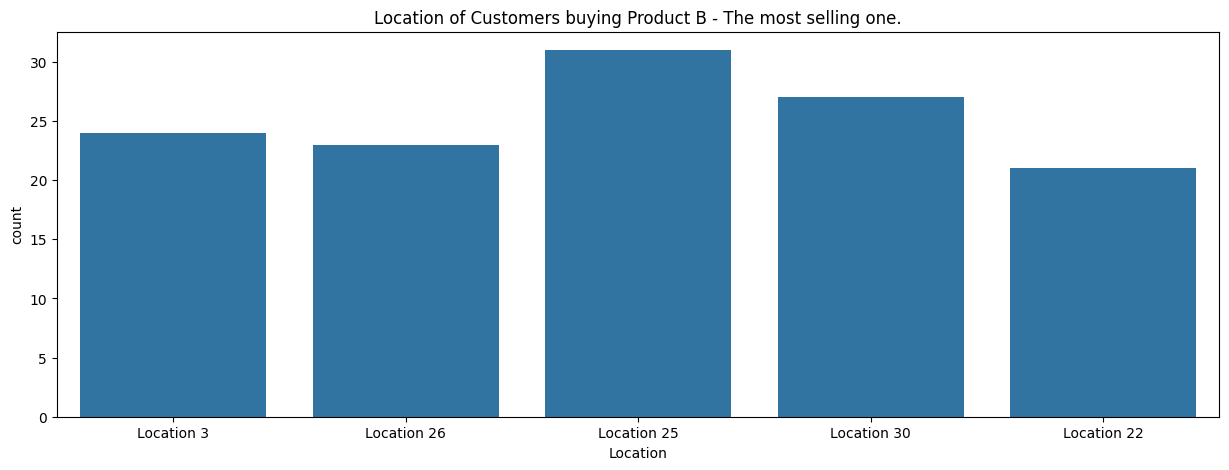

In [99]:
plt.title("Location of Customers buying Product B - The most selling one.")
sns.countplot(x=filtered_locations)
plt.show()

We also got the location of customers now, we can apply targeted advertising here.

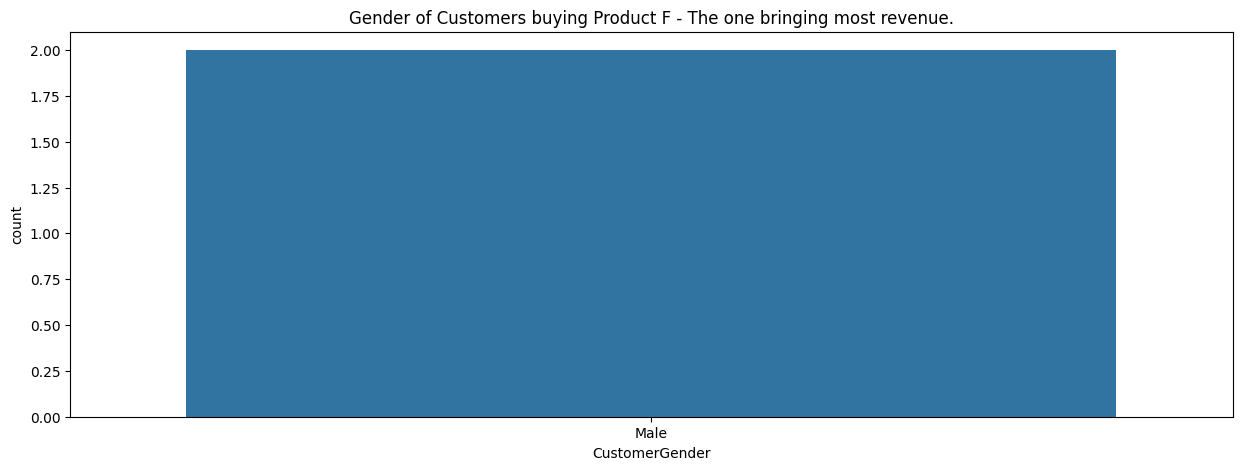

In [80]:
product_b_customers_gndr = df[df['Product'] == 'Product F']['CustomerGender'].value_counts()
plt.title("Gender of Customers buying Product F - The one bringing most revenue.")
sns.barplot(product_b_customers_gndr)
plt.show()

Product F has high price and the buyers are Male. This could be a Car of something similar.
- We can consider suggesting relevant stuff/gadgets to its customers to boost sales.

In [81]:
df.head()

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,2,LoanID_2,Product D,Female,Location 6,Region 6,20624.0,02/01/2019,2200,45,365,3161,4096,16041,Active
2,3,LoanID_3,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,Finished Payment
3,4,LoanID_4,Product A,Male,Location 26,Region 2,17600.0,23/04/2019,2200,45,365,3141,4166,16321,Active
4,5,LoanID_5,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


#### An eye of defaulters

In [101]:
df['LoanStatus'].unique()

array(['Active', 'Finished Payment', 'Blocked'], dtype=object)

In [102]:
df[df['LoanStatus'] == 'Blocked']

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
482,483,LoanID_483,Product A,Male,Location 97,Region 6,18950.0,27/10/2019,1000,55,365,-250,-425,650,Blocked
483,484,LoanID_484,Product B,Male,Location 46,Region 6,16300.0,24/04/2019,2200,45,365,9301,9126,10701,Blocked
484,485,LoanID_485,Product D,Male,Location 59,Region 10,19950.0,15/10/2017,2200,55,365,3850,4925,13110,Blocked
485,486,LoanID_486,Product B,Male,Location 574,Region 2,16300.0,29/03/2018,2200,45,365,2500,2325,3600,Blocked
486,487,LoanID_487,Product B,NotSpecified,Location 26,Region 1,16300.0,24/05/2018,2200,45,365,4900,4725,8250,Blocked
487,488,LoanID_488,Product A,Male,Location 49,Region 3,18950.0,12/02/2020,1000,55,365,450,1425,6950,Blocked
488,489,LoanID_489,Product D,Female,Location 39,Region 6,16300.0,11/02/2018,2200,45,365,3081,3376,8781,Blocked
489,490,LoanID_490,Product A,Male,Location 20,Region 1,18950.0,15/03/2020,1000,55,365,-1750,-605,2480,Blocked
490,491,LoanID_491,Product A,Male,Location 529,Region 6,19950.0,21/11/2019,2200,55,365,2051,2876,4801,Blocked
491,492,LoanID_492,Product B,NotSpecified,Location 554,Region 6,16300.0,19/01/2019,2200,45,365,3021,3266,5481,Blocked


So, this was an analysis of quite decent depth. I would love to hear your thought on it. Thanks